In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
# Save the current style settings
# original_rc_params = mpl.rcParams.copy()

# Set a Seaborn style
sns.set_style("white")
sns.set_palette(palette='Dark2')

%matplotlib inline

# get data and predictions

In [2]:
# particular_path = '2dcosk5_hu200_hdata'
# particular_path = '2dgauss_double_hdata/test2'
# particular_path = '2dgauss_double_hdata/test3'
# particular_path = '2dgauss_double_hdata/fixed_buoys'
# particular_path = '2dgauss_double_hdata/fixedbuoys_sampleprob'
particular_path = '2dgauss_double_hdata/alpha_test'

# particular_path = 'fixed_buoys/2dcosk5_fixed_buoys'
# particular_path = 'fixed_buoys/2D_GD_fixed_buoys'

parent_path = f'./{particular_path}'
ckpt_folder = 't10'
path = parent_path + '/' + ckpt_folder
dt = 2.5e-2

# fig_path = parent_path +'/2dcosk5_hu200_hdata_figures'
fig_path = parent_path +'/figures'
# fig_path = parent_path +'/2dcosk5_hu200_figures'
# fig_path = parent_path +'/2dgauss_double_figures'
%matplotlib inline

In [3]:
try:
    rs = [r for r in os.listdir(path) if (r.startswith('ref') and r.endswith('.npy'))]
    rs.remove('ref.npy')
    # sort the ref frames
    ref_tidxs = []
    for word in rs:
        number = ''
        for l in word:
            if l.isnumeric():
                number = number + l
        ref_tidxs.append(int(number))

    ref_dict ={t:r for t,r in zip(ref_tidxs , rs)}
    print(ref_dict)
    rs = [ref_dict[key] for key in sorted(ref_dict.keys())]
    print('rs  =  ' , rs)
    refs = [np.load(f'{path}/{r}') for r in rs]

    # same for predicted
    ps = [p for p in os.listdir(path) if (p.startswith('predicted') and p.endswith('.npy'))]
    ps.remove('predicted.npy')
    # sort predicted frames
    p_tidxs = []
    for word in ps:
        number = ''
        for l in word:
            if l.isnumeric():
                number = number + l
        p_tidxs.append(int(number))

    p_dict ={t:r for t,r in zip(p_tidxs , ps)}
    print(p_dict)
    ps = [p_dict[key] for key in sorted(p_dict.keys())]
    print('ps  =  ' , ps)
    pinns = [np.load(f'{path}/{p}') for p in ps]

    # now sort frame numbers, and get actual times
    ref_tidxs.sort()
    p_tidxs.sort()

    ts = np.array(ref_tidxs)*dt

    print('\n ts  =  ' , ts)
except:
    print("no multiple ref and predicted files to get")

{}
rs  =   []
{}
ps  =   []

 ts  =   []


In [8]:
ref = np.load(f'{path}/ref.npy')
U = ref[0]
V = ref[1]
H = ref[2]
HB = ref[-1]


pinn = np.load(f'{path}/predicted.npy')
u = pinn[0] - pinn[0].mean()
v = pinn[1]
h = pinn[2]
hb = pinn[-1]


loss = np.loadtxt(f'{path}/output.dat', unpack=True)
bal = np.loadtxt(f'{path}/balance.dat', unpack=True)

val = np.loadtxt(f'{path}/validation.dat' , unpack=True)

N = len(ref[0])
domain = np.linspace(0,2*np.pi, N)
h0 = 1
print('h.mean()   =   ' ,   h.mean(), 'H.mean()   =   ' ,   H.mean())

h.mean()   =    1.0055232 H.mean()   =    1.0055388



# 1D prediction plots section

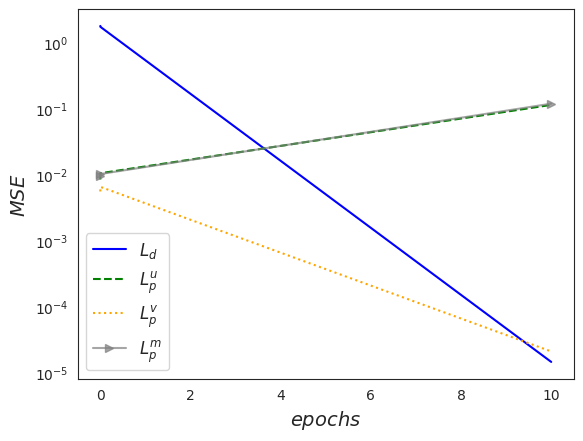

<Figure size 640x480 with 0 Axes>

In [ ]:
# # Loss functions
#        output_file = open(self.dest + 'output.dat', 'a')
#        print(ep, f'{lu}', f'{lmomuf}', f'{lmomvf}', f'{lmassf}',
#              file=output_file)

plt.figure()
plt.semilogy(loss[0], loss[1] , label = '$L_d$'  , color = 'blue')
plt.semilogy(loss[0], loss[2] , label = '$L_p^{u}$' , color = 'green' , linestyle = '--')
plt.semilogy(loss[0], loss[-1] , label = '$L_p^{m}$' , color = 'grey', marker = '>', alpha=0.7)
plt.semilogy(loss[0], loss[3] , label = '$L_p^{v}$' , color = 'orange', linestyle = ':')

plt.xlabel('$epochs$', fontsize = 14)
plt.ylabel('$MSE$', fontsize = 14)
plt.legend(fontsize = 12)
plt.show()
plt.savefig(f'{fig_path}/loss.png')


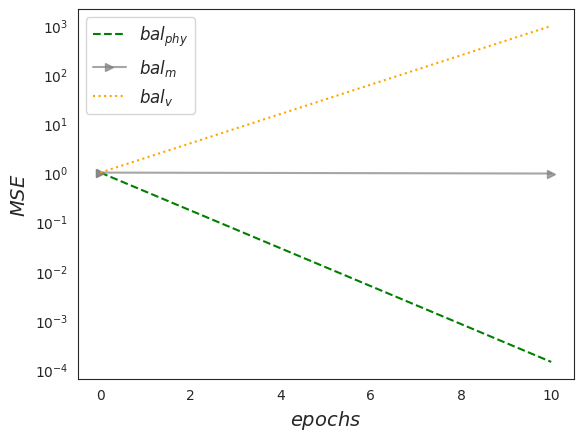

<Figure size 640x480 with 0 Axes>

In [10]:
#print(ep, self.bal_phys.numpy(), self.bal_phys_m.numpy(), self.bal_phys_v.numpy(), file=output_file)
plt.figure()
plt.semilogy(bal[0], bal[1] , label = '$bal_{phy}$',  color = 'green' , linestyle = '--')
plt.semilogy(bal[0], bal[2] , label = '$bal_{m}$'  ,  color = 'grey', marker = '>', alpha=0.7)
plt.semilogy(bal[0], bal[3] , label = '$bal_{v}$'  , color = 'orange', linestyle = ':', )


plt.xlabel('$epochs$', fontsize = 14)
plt.ylabel('$MSE$', fontsize = 14)
plt.legend(fontsize = 12)
plt.show()
plt.savefig(f'{fig_path}/balance.png')

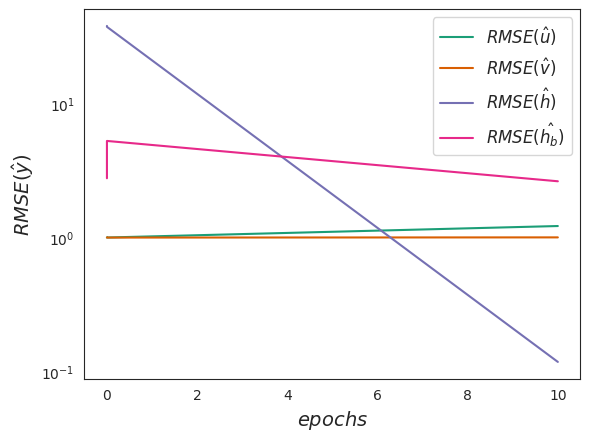

In [11]:
plt.figure()
plt.semilogy(val[0] , val[1] , label = '$RMSE(\hat{u})$' )
plt.semilogy(val[0] , val[2] , label = '$RMSE(\hat{v})$' )
plt.semilogy(val[0] , val[3] , label = '$RMSE(\hat{h})$')
plt.semilogy(val[0] , val[-1] , label = '$RMSE(\hat{h_b})$' )

plt.xlabel('$epochs$', fontsize = 14)
plt.ylabel('$RMSE(\hat{y})$', fontsize = 14)
plt.legend( fontsize = 12)
plt.savefig(f'{fig_path}/validation.png')


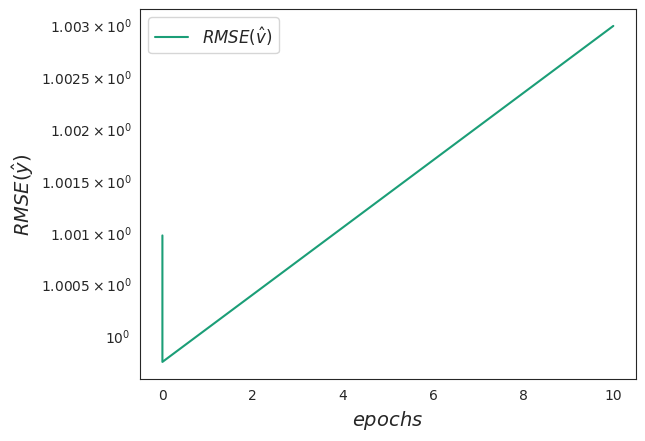

In [12]:
plt.figure(3)
plt.semilogy(val[0] , val[2] , label = '$RMSE(\hat{v})$' )

plt.xlabel('$epochs$', fontsize = 14)
plt.ylabel('$RMSE(\hat{y})$', fontsize = 14)
plt.legend( fontsize = 12)
plt.savefig(f'{fig_path}/validation_v.png')

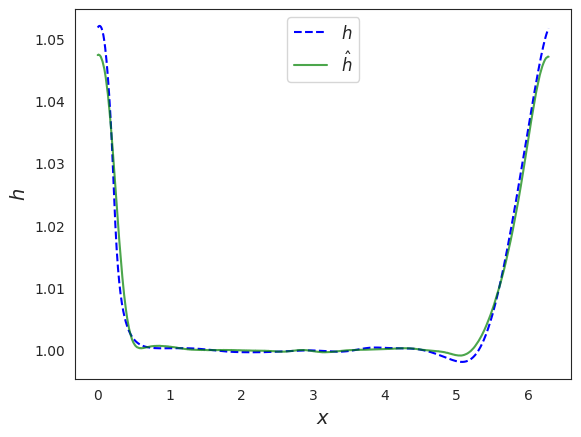

In [13]:
plt.figure()
plt.plot(domain ,H[:, 512] , label = '$h$' ,  linestyle = '--' , color = 'blue')
plt.plot(domain , h[:, 512] ,  label = '$\hat{h}$' , alpha = 0.7 , color = 'green')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$h$', fontsize = 14)
plt.legend(fontsize = 12)
plt.savefig(f'{fig_path}/h_1D.png')

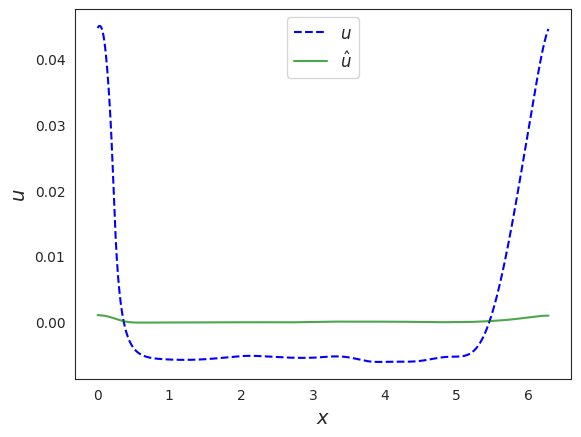

In [14]:
plt.figure()
plt.plot(domain , U[:, 512] , label = '$u$' ,  linestyle = '--' , color = 'blue')
plt.plot(domain , u[:, 512] ,  label = '$\hat{u}$' , alpha = 0.7 , color = 'green')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$u$', fontsize = 14)
plt.legend(fontsize = 12)
plt.savefig(f'{fig_path}/u_1D.png')


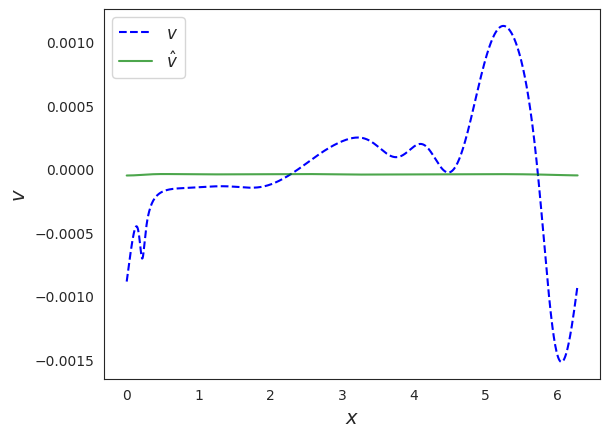

In [27]:
plt.figure()
plt.plot(domain ,V[:, 700] , label = '$v$' ,  linestyle = '--' , color = 'blue')
plt.plot(domain ,v[:, 700] ,  label = '$\hat{v}$' , alpha = 0.7 , color = 'green')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$v$', fontsize = 14)
plt.legend(fontsize = 12)
plt.savefig(f'{fig_path}/v_1D.png')

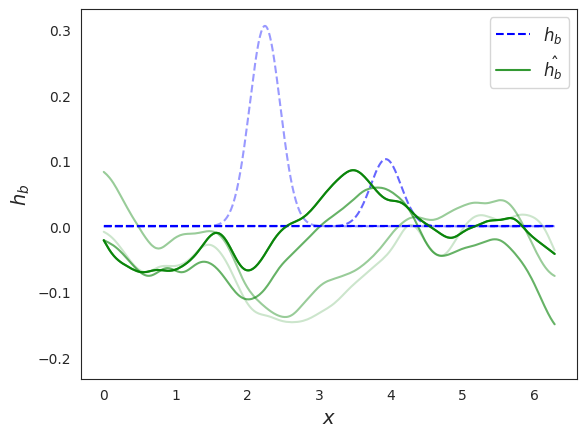

In [ ]:
plt.figure()
for yy, alpha in zip(range(0,1024,200) , np.arange(0,1,0.2) ):
    plt.plot(domain ,HB[:, yy] ,   linestyle = '--' , alpha = alpha , color = 'blue')
    plt.plot(domain ,hb[:, yy] ,   alpha = alpha , color = 'green')

plt.plot(domain ,HB[:, yy] , label = '$h_b$' ,  linestyle = '--' , color = 'blue')
plt.plot(domain ,hb[:, yy] ,  label = '$\hat{h_b}$' , alpha = alpha , color = 'green')

plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$h_b$', fontsize = 14)
plt.legend(fontsize = 12)
plt.savefig(f'{fig_path}/hb_1D.png')

# 3d image diagram

/tmp/ipykernel_908658/2426942071.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


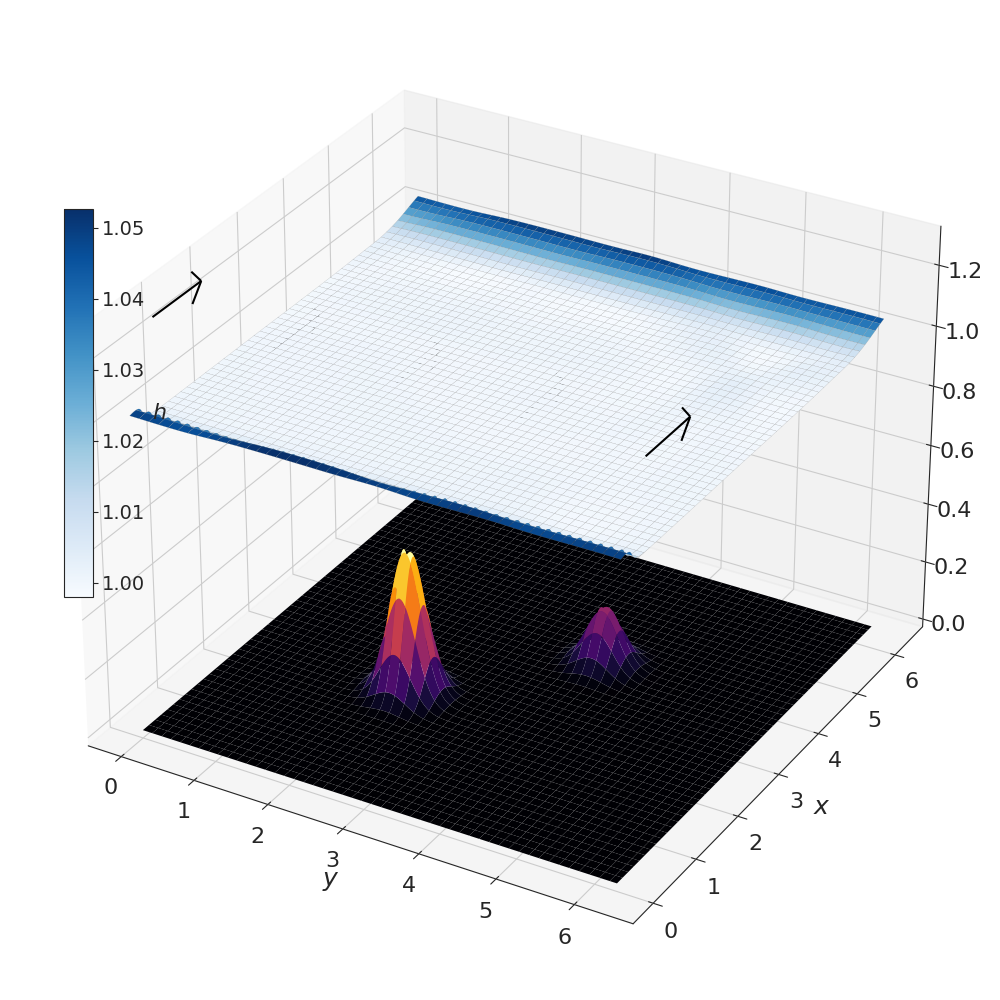

In [19]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Set up grid and test data
nx, ny = 512, 512
x = np.linspace(0, 2*np.pi, N)[512-nx:512+nx]
y = np.linspace(0, 2*np.pi, N)[512-ny:512+ny]

data1 = ref[2][512-nx:512+nx, 512-ny:512+ny]
data2 = ref[-1][512-nx:512+nx, 512-ny:512+ny]

hf = plt.figure(figsize=(10, 10))
ha1 = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)

# ----- Surfaces ----------------------------------------------------------
surf1 = ha1.plot_surface(X, Y, data1, cmap='Blues', edgecolor='grey',    linewidth=0.1 )
surf2 = ha1.plot_surface(X, Y, data2, cmap='inferno', edgecolor='none')

# ----- COLORBAR 1: for data1 (Blues) -------------------------------------
cax1 = inset_axes(
    ha1,
    width="3%",      # width of colorbar
    height="40%",    # height of colorbar
    loc='center left',
    bbox_to_anchor=(0.05, 0.1, 1, 1),
    bbox_transform=ha1.transAxes,
    borderpad=0
)

cbar1 = hf.colorbar(surf1, cax=cax1)
cbar1.set_label(r"$h$", fontsize=16, rotation=0, labelpad=10)
cbar1.ax.tick_params(labelsize=14)

# ----- COLORBAR 2: for data2 (inferno) -----------------------------------
cax2 = inset_axes(
    ha1,
    width="3%",
    height="40%",
    loc='center right',
    bbox_to_anchor=(0.05, 0.1, 1, 1),
    bbox_transform=ha1.transAxes,
    borderpad=0
)

cbar2 = hf.colorbar(surf2, cax=cax2)
cbar2.set_label(r"$h_b$", fontsize=16, rotation=0, labelpad=10)
cbar2.ax.tick_params(labelsize=14)

# ----- Axis labels & ticks -----------------------------------------------
ha1.set_xlabel("$y$", fontsize=18)
ha1.set_ylabel("$x$", fontsize=18)
ha1.tick_params(axis='both', which='major', labelsize=16)
ha1.tick_params(axis='z', which='major', labelsize=16)

# ----- Arrows -------------------------------------------------------------
x_annotate = domain[np.argmax(ref[2][:, 512])] + 0.5
z_annotate = h0 + 0.3
y_coords = np.linspace(y.min(), y.max(), 5)

for y_annotate in y_coords:
    ha1.quiver(
        y_annotate, x_annotate, z_annotate,
        0, 1, 0,
        color='black', arrow_length_ratio=0.2, zorder=50
    )

plt.tight_layout()
plt.show()


In [18]:
# Save the figure without margins once it is the angle we want
plt.savefig(f'{fig_path}/h_hb_diagram_3d.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [34]:
if save_3d:

    # Save the figure without margins once it is the angle we want
    plt.savefig(f'{fig_path}/v_diagram_3d_{particular_path}.png', bbox_inches='tight')

NameError: name 'save_3d' is not defined

# hb 3D and 2D plots

## hb 3D plots

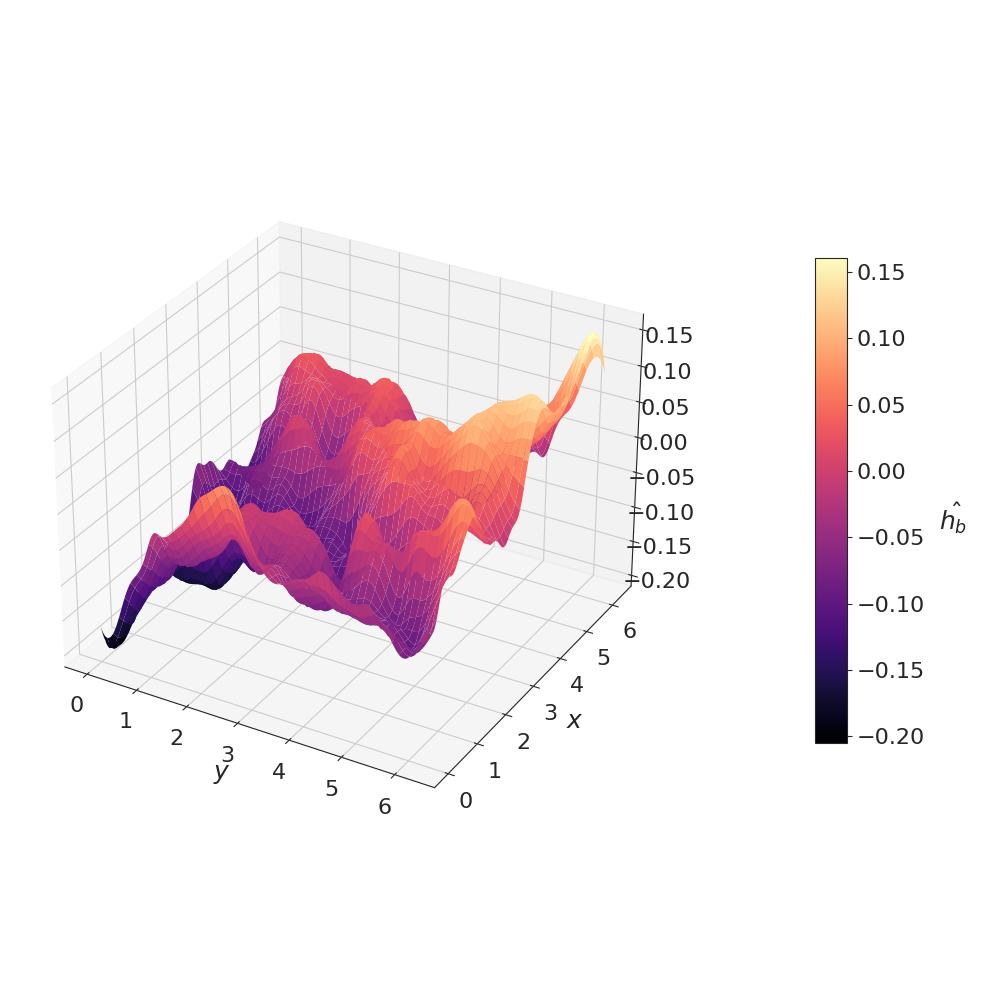

In [20]:
%matplotlib widget
hf = plt.figure(figsize=(10, 10))
ha1 = hf.add_subplot(111, projection='3d')
x = np.linspace(0, 2*np.pi, N)
y = np.linspace(0, 2*np.pi, N)
X, Y = np.meshgrid(x, y)

# -- Surface plot --------------------------------------------------------
surf = ha1.plot_surface(
    X, Y, hb,
    cmap='magma',
    edgecolor='none'
)



# -- Colorbar ------------------------------------------------------------
cbar = hf.colorbar(
    surf,
    ax=ha1,
    shrink=0.5,     # makes the colorbar shorter (0.5 = half height)
    aspect=15,      # controls thickness (higher = thinner)
    pad=0.15        # distance between plot and colorbar
)
cbar.set_label(r"$\hat{h_b}$", fontsize=18, rotation=0, labelpad=20)
cbar.ax.tick_params(labelsize=16)  # colorbar tick labels



# -- Axes labels ---------------------------------------------------------
# ha1.set_zlabel("$\hat{h_b}$", fontsize=18)
ha1.set_xlabel("$y$", fontsize=18)
ha1.set_ylabel("$x$", fontsize=18)

# -- Tick label size -----------------------------------------------------
ha1.tick_params(axis='both', which='major', labelsize=16)
ha1.tick_params(axis='z', which='major', labelsize=16)

# alternatively for full control:
# ha1.set_xticklabels(ha1.get_xticks(), fontsize=16)
# ha1.set_yticklabels(ha1.get_yticks(), fontsize=16)
# ha1.set_zticklabels(ha1.get_zticks(), fontsize=16)

plt.tight_layout()
plt.show()

In [81]:

# Save the figure without margins once it is the angle we want
plt.savefig(f'{fig_path}/hb_3d.png', bbox_inches='tight')

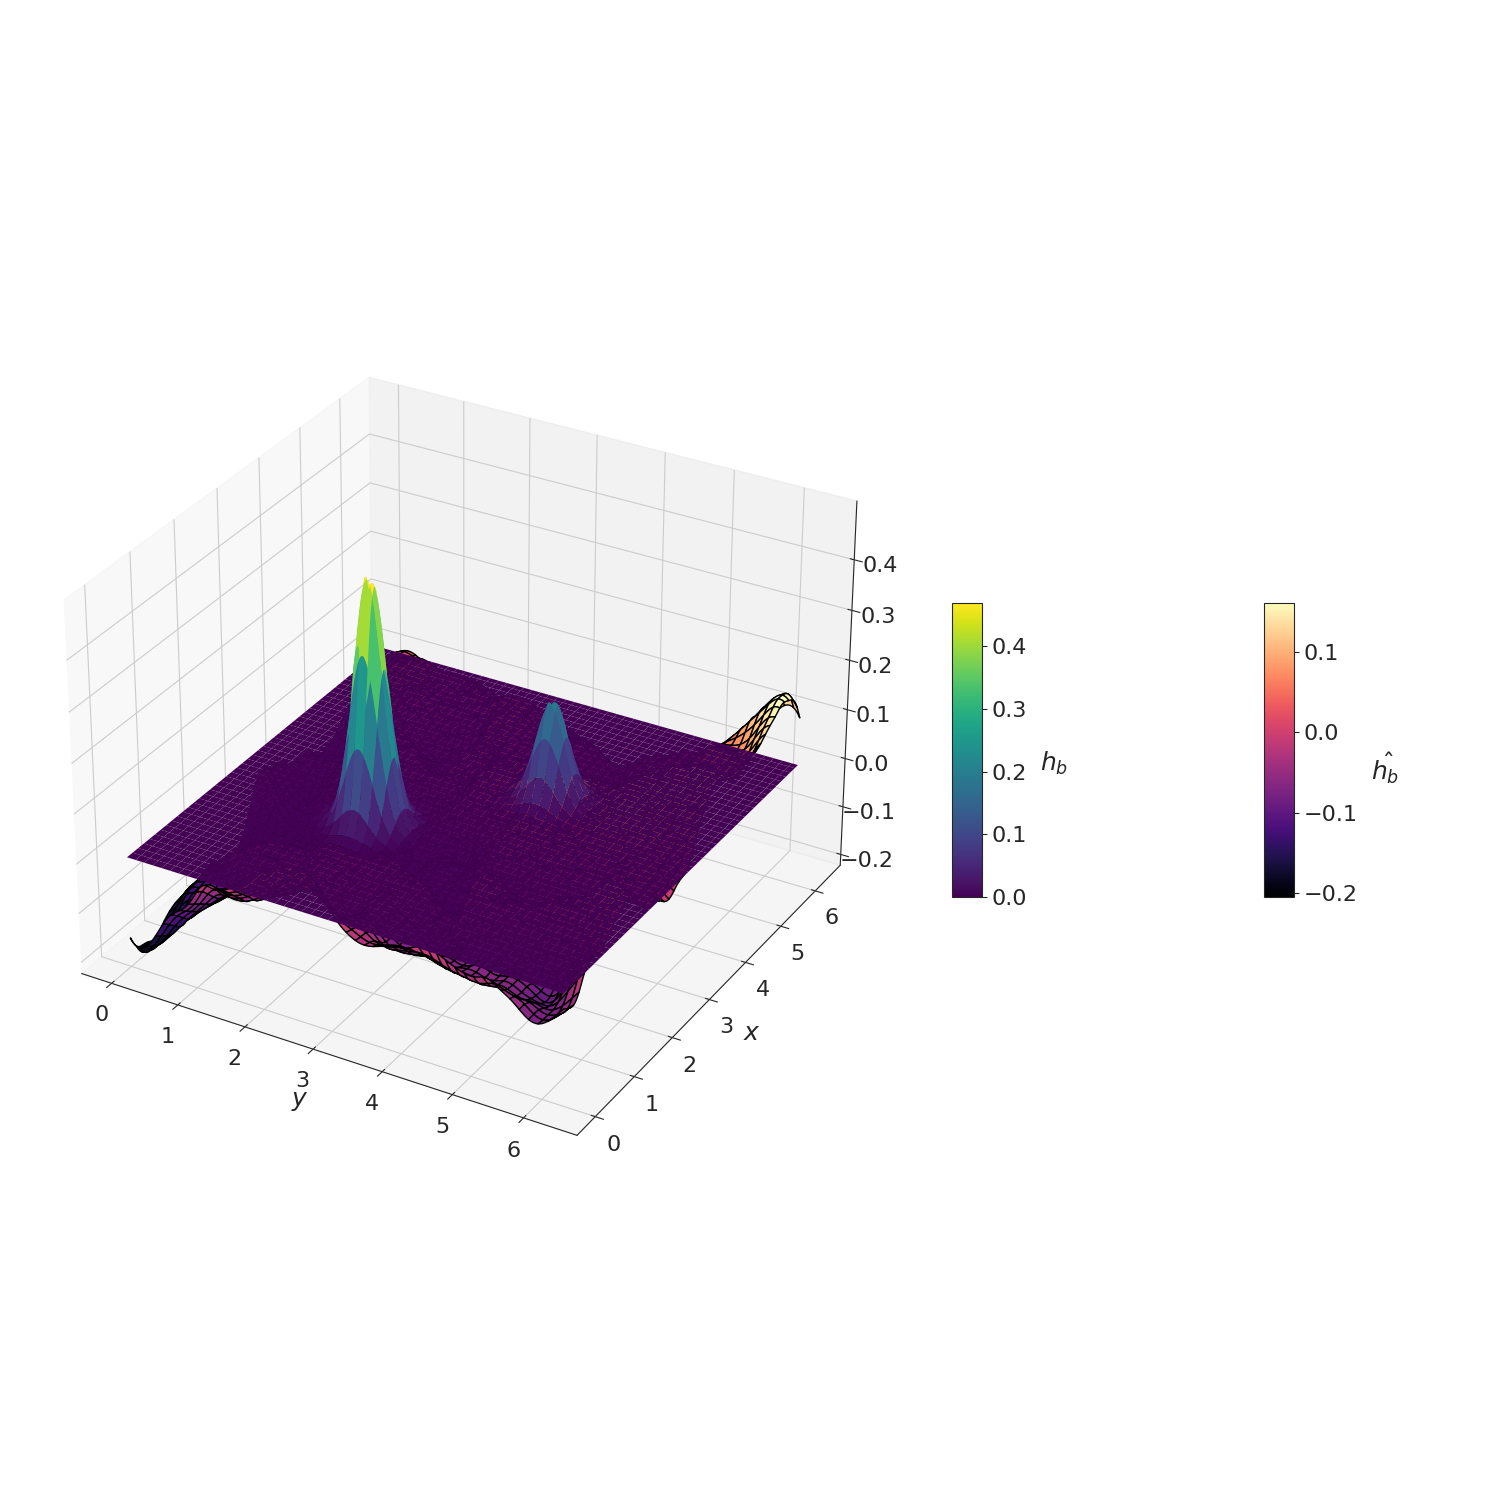

In [21]:
%matplotlib widget
hf = plt.figure(figsize=(15, 15))
ha1 = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)

# -- Surface plot --------------------------------------------------------
surf = ha1.plot_surface(
    X, Y, hb,
    cmap='magma',
    edgecolor='black'
)

surf_ref= ha1.plot_surface(
    X, Y, HB,
    cmap='viridis',
    edgecolor='none'
)


# -- Colorbar ------------------------------------------------------------
cbar = hf.colorbar(
    surf,
    ax=ha1,
    shrink=0.2,     # makes the colorbar shorter (0.5 = half height)
    aspect=10,      # controls thickness (higher = thinner)
    pad=0.10       # distance between plot and colorbar
)
cbar.set_label(r"$\hat{h_b}$", fontsize=18, rotation=0, labelpad=20)
cbar.ax.tick_params(labelsize=16)  # colorbar tick labels

# -- reference Colorbar ------------------------------------------------------------
cbar2 = hf.colorbar(
    surf_ref,
    ax=ha1,
    shrink=0.2,     # makes the colorbar shorter (0.5 = half height)
    aspect=10,      # controls thickness (higher = thinner)
    pad=0.05        # distance between plot and colorbar
)
cbar2.set_label(r"$h_b$", fontsize=18, rotation=0, labelpad=20)
cbar2.ax.tick_params(labelsize=16)  # colorbar tick labels


# -- Axes labels ---------------------------------------------------------
# ha1.set_zlabel("$\hat{h_b}$", fontsize=18)
ha1.set_xlabel("$y$", fontsize=18)
ha1.set_ylabel("$x$", fontsize=18)

# -- Tick label size -----------------------------------------------------
ha1.tick_params(axis='both', which='major', labelsize=16)
ha1.tick_params(axis='z', which='major', labelsize=16)

# alternatively for full control:
# ha1.set_xticklabels(ha1.get_xticks(), fontsize=16)
# ha1.set_yticklabels(ha1.get_yticks(), fontsize=16)
# ha1.set_zticklabels(ha1.get_zticks(), fontsize=16)

plt.tight_layout()
plt.show()


In [31]:

# Save the figure without margins once it is the angle we want
plt.savefig(f'{fig_path}/hb_3d_with_ref.png', bbox_inches='tight')

### error 3D

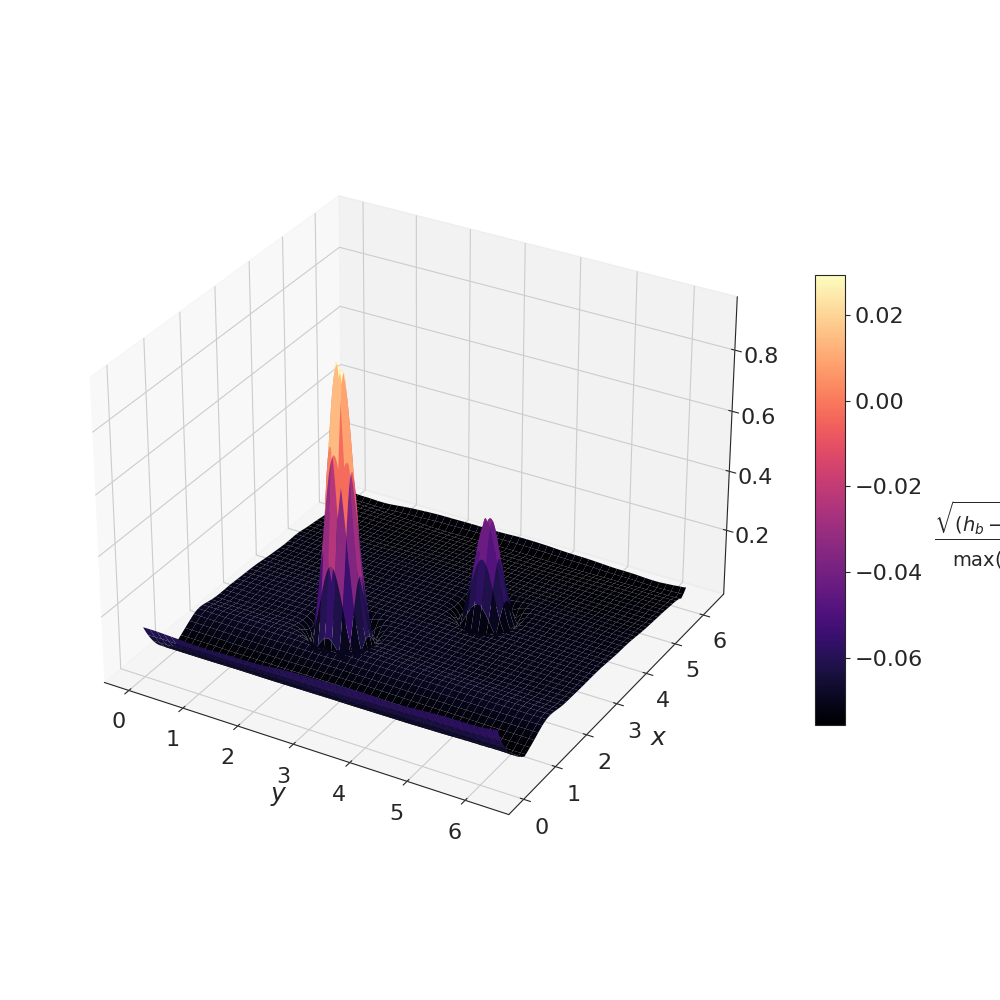

In [ ]:
# error 3d graph for hb
# Restore the original style settings
# mpl.rcParams.update(original_rc_params)

%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D

# Set up grid and test data
x = np.linspace(0,2*np.pi, N)
y = np.linspace(0,2*np.pi, N)
X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize= (10 , 10))
ha1 = hf.add_subplot(111, projection='3d')


ha1.plot_surface(X, Y, np.sqrt((hb - HB)**2)/np.max(HB) , cmap = 'magma', edgecolor='none' )

# -- Colorbar ------------------------------------------------------------
cbar = hf.colorbar(
    surf,
    ax=ha1,
    shrink=0.5,     # makes the colorbar shorter (0.5 = half height)
    aspect=15,      # controls thickness (higher = thinner)
    pad=0.05        # distance between plot and colorbar
)
cbar.set_label(r"$\frac{\sqrt{(h_b - \hat{h_b})^2}}{\max(\hat{h_b})}$", fontsize=20, rotation=0, labelpad=50)   # ← label on colorbar
cbar.ax.tick_params(labelsize=16)  # colorbar tick labels

# -- Axes labels ---------------------------------------------------------
# ha1.set_zlabel(r"$\frac{\sqrt{(h_b - \hat{h_b})}}{\max(\hat{h_b})}$", fontsize=18)
ha1.set_xlabel("$y$", fontsize=18)
ha1.set_ylabel("$x$", fontsize=18)

# -- Tick label size -----------------------------------------------------
ha1.tick_params(axis='both', which='major', labelsize=16)
ha1.tick_params(axis='z', which='major', labelsize=16)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0, hspace=0)

# Adjust the spacing between the subplots and the edges of the figure
# plt.subplots_adjust(left=0.05, right=0.90, top=0.95, bottom=0.05, wspace=0.1)
# plt.legend()
plt.show()

In [ ]:
plt.savefig(f'{fig_path}/hberror_3d.png', bbox_inches='tight')

## hb 2D plots 

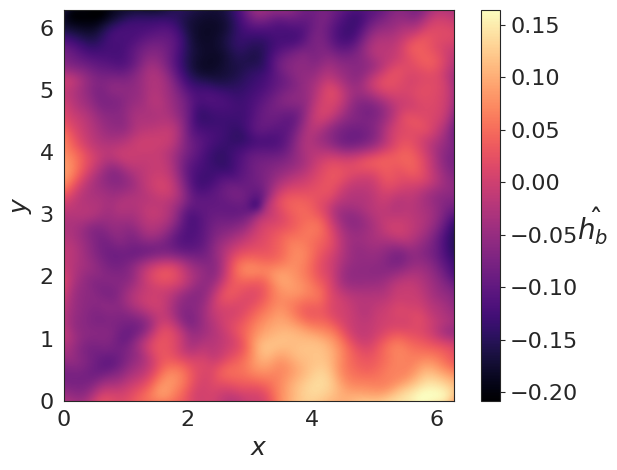

In [32]:
%matplotlib inline

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the image
f = ax.imshow(np.transpose(hb), cmap='magma', extent=[domain.min(), domain.max(), domain.min(), domain.max()])
ax.set_xlabel('$x$', fontsize = 18)
ax.set_ylabel('$y$', fontsize = 18)

# -- Tick label size -----------------------------------------------------
ax.tick_params(axis='both', which='major', labelsize=16)

# Create a single color bar for the entire figure
# cbar = fig.colorbar(f, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
# -- Colorbar ------------------------------------------------------------
cbar = fig.colorbar(
    f,
    ax=ax,
    #shrink=0.5,     # makes the colorbar shorter (0.5 = half height)
    #aspect=15,      # controls thickness (higher = thinner)
    #pad=0.05        # distance between plot and colorbar
)
cbar.set_label(r"$\hat{h_b}$", fontsize=20, rotation=0, labelpad=10)   # ← label on colorbar
cbar.ax.tick_params(labelsize=16)  # colorbar tick labels
# Adjust layout and save the plot
plt.tight_layout()
plt.savefig(f'{fig_path}/hb_implot.png')

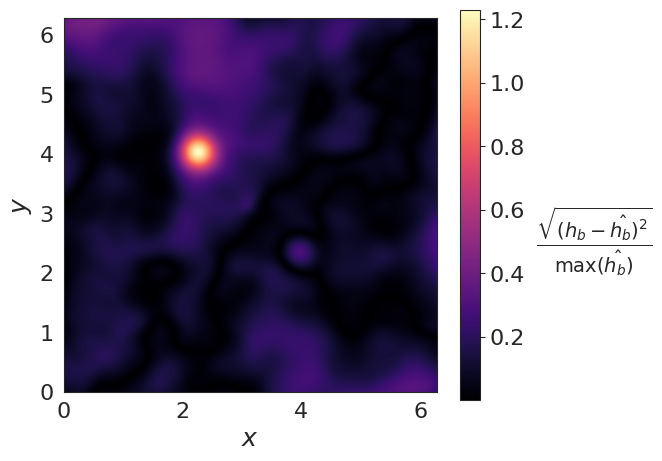

In [33]:
%matplotlib inline
# Create the figure and axis
fig, ax = plt.subplots()

# Plot the image
f = ax.imshow(np.transpose(np.sqrt((hb - HB)**2)/np.max(HB)),
              cmap='magma',
              extent=[domain.min(),
                      domain.max(),
                      domain.min(),
                      domain.max()])

ax.set_xlabel('$x$', fontsize = 18)
ax.set_ylabel('$y$', fontsize = 18)

# -- Tick label size -----------------------------------------------------
ax.tick_params(axis='both', which='major', labelsize=16)

# Create a single color bar for the entire figure
# cbar = fig.colorbar(f, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
# -- Colorbar ------------------------------------------------------------
cbar = fig.colorbar(
    f,
    ax=ax,
    #shrink=0.5,     # makes the colorbar shorter (0.5 = half height)
    #aspect=15,      # controls thickness (higher = thinner)
    #pad=0.05        # distance between plot and colorbar
)
cbar.set_label(r"$\frac{\sqrt{(h_b - \hat{h_b})^2}}{\max(\hat{h_b})}$",
               fontsize=20,
               rotation=0,
               labelpad=50)   # ← label on colorbar
cbar.ax.tick_params(labelsize=16)  # colorbar tick labels
# Adjust layout and save the plot
plt.tight_layout()
plt.savefig(f'{fig_path}/hberror_implot.png')

# u 3D and 2D plots

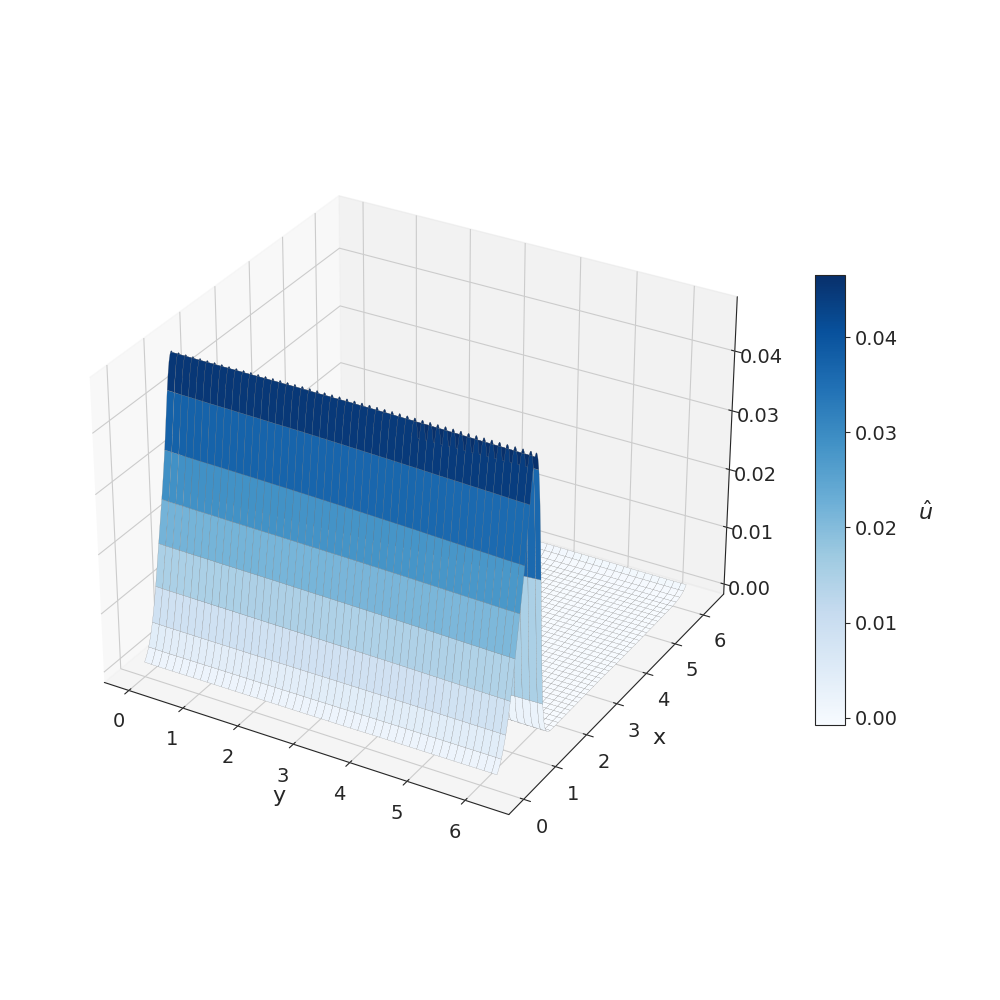

In [ ]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Set up grid and test data
x = np.linspace(0, 2*np.pi, N)
y = np.linspace(0, 2*np.pi, N)
X, Y = np.meshgrid(x, y)

hf = plt.figure(figsize=(10, 10))
ha1 = hf.add_subplot(111, projection='3d')


# --- Surface --------------------------------------------------------------
surf = ha1.plot_surface(
    X, Y, u,
    cmap='Blues',
    edgecolor='grey',
    linewidth=0.15     # thinner edges
)

# --- Colorbar (small, right side, horizontal label) -----------------------
cbar = hf.colorbar(
    surf,
    ax=ha1,
    shrink=0.5,     # makes the colorbar shorter (0.5 = half height)
    aspect=15,      # controls thickness (higher = thinner)
    pad=0.05        # distance between plot and colorbar
)

cbar.set_label("$\hat{u}$", fontsize=16, rotation=0, labelpad=20)
cbar.ax.tick_params(labelsize=14)

# --- Labels ---------------------------------------------------------------
ha1.set_xlabel("y", fontsize=16)
ha1.set_ylabel("x", fontsize=16)
ha1.tick_params(axis='both', labelsize=14)
ha1.tick_params(axis='z', labelsize=14)

# Layout
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

plt.show()


In [ ]:
plt.savefig(f'{fig_path}/u_3d.png', bbox_inches='tight')

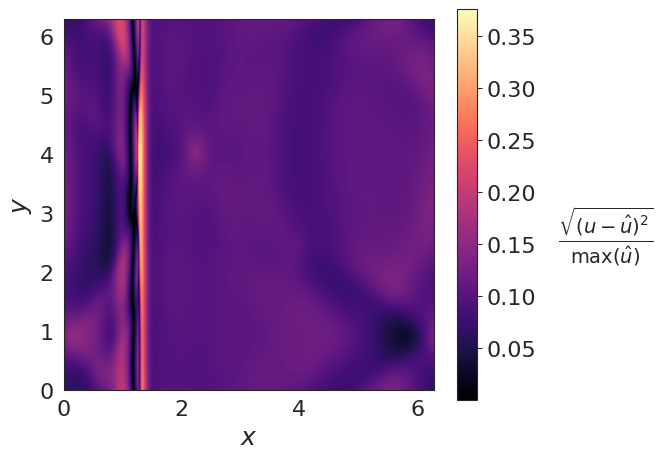

In [ ]:
%matplotlib inline

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the image
f = ax.imshow(np.transpose(np.sqrt((u - U)**2)/np.max(U)),
              cmap='magma',
              extent=[domain.min(),
                      domain.max(),
                      domain.min(),
                      domain.max()])

ax.set_xlabel('$x$', fontsize = 18)
ax.set_ylabel('$y$', fontsize = 18)

# -- Tick label size -----------------------------------------------------
ax.tick_params(axis='both', which='major', labelsize=16)

# Create a single color bar for the entire figure
# cbar = fig.colorbar(f, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
# -- Colorbar ------------------------------------------------------------
cbar = fig.colorbar(
    f,
    ax=ax,
    #shrink=0.5,     # makes the colorbar shorter (0.5 = half height)
    #aspect=15,      # controls thickness (higher = thinner)
    #pad=0.05        # distance between plot and colorbar
)
cbar.set_label(r"$\frac{\sqrt{(u - \hat{u})^2}}{\max(\hat{u})}$", fontsize=20, rotation=0, labelpad=50)   # ← label on colorbar
cbar.ax.tick_params(labelsize=16)  # colorbar tick labels
# Adjust layout and save the plot
plt.tight_layout()
plt.savefig(f'{fig_path}/uerror_implot_{particular_path}.png')

# v 3D and 2D plots

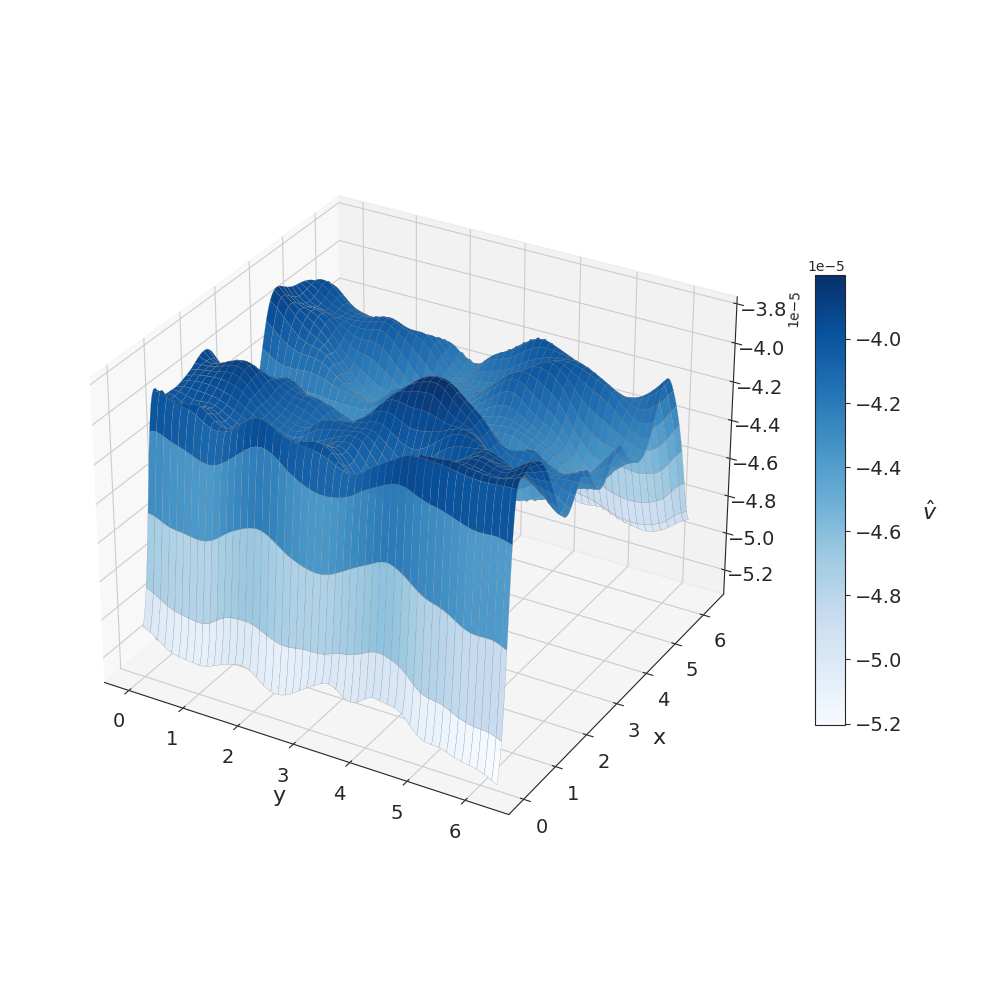

In [34]:
# error 3d graph for hb
# Restore the original style settings
# mpl.rcParams.update(original_rc_params)

%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D

# Set up grid and test data
x = np.linspace(0,2*np.pi, N)
y = np.linspace(0,2*np.pi, N)
X, Y = np.meshgrid(x, y)

hf = plt.figure(figsize=(10, 10))
ha1 = hf.add_subplot(111, projection='3d')


# --- Surface --------------------------------------------------------------
surf = ha1.plot_surface(
    X, Y, v,
    cmap='Blues',
    edgecolor='grey',
    linewidth=0.15     # thinner edges
)

# --- Colorbar (small, right side, horizontal label) -----------------------
cbar = hf.colorbar(
    surf,
    ax=ha1,
    shrink=0.5,     # makes the colorbar shorter (0.5 = half height)
    aspect=15,      # controls thickness (higher = thinner)
    pad=0.05        # distance between plot and colorbar
)

cbar.set_label("$\hat{v}$", fontsize=16, rotation=0, labelpad=20)
cbar.ax.tick_params(labelsize=14)

# --- Labels ---------------------------------------------------------------
ha1.set_xlabel("y", fontsize=16)
ha1.set_ylabel("x", fontsize=16)
ha1.tick_params(axis='both', labelsize=14)
ha1.tick_params(axis='z', labelsize=14)

# Layout
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

plt.show()


In [ ]:
plt.savefig(f'{fig_path}/vy_3d_{particular_path}.png', bbox_inches='tight')

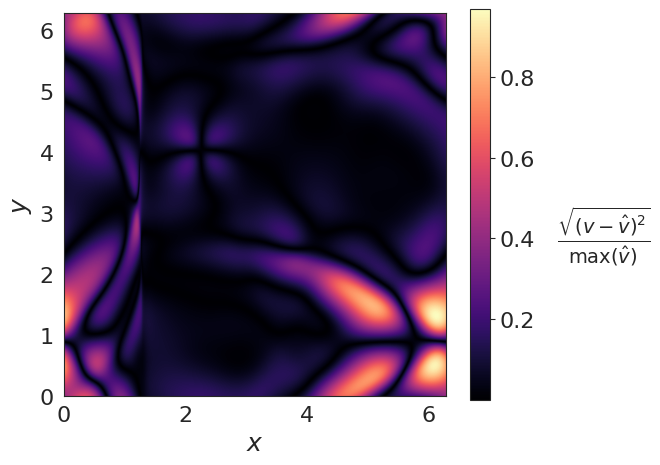

In [ ]:
%matplotlib inline
# Create the figure and axis
fig, ax = plt.subplots()

# Plot the image
f = ax.imshow(np.transpose(np.sqrt((V - v)**2)/np.max(V)),
              cmap='magma',
              extent=[domain.min(),
                      domain.max(),
                      domain.min(),
                      domain.max()])

ax.set_xlabel('$x$', fontsize = 18)
ax.set_ylabel('$y$', fontsize = 18)

# -- Tick label size -----------------------------------------------------
ax.tick_params(axis='both', which='major', labelsize=16)

# Create a single color bar for the entire figure
# cbar = fig.colorbar(f, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
# -- Colorbar ------------------------------------------------------------
cbar = fig.colorbar(
    f,
    ax=ax,
    #shrink=0.5,     # makes the colorbar shorter (0.5 = half height)
    #aspect=15,      # controls thickness (higher = thinner)
    #pad=0.05        # distance between plot and colorbar
)
cbar.set_label(r"$\frac{\sqrt{(v - \hat{v})^2}}{\max(\hat{v})}$",
               fontsize=20,
               rotation=0,
               labelpad=50)   # ← label on colorbar

cbar.ax.tick_params(labelsize=16)  # colorbar tick labels
# Adjust layout and save the plot
plt.tight_layout()
plt.savefig(f'{fig_path}/verror_implot.png')